In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import random

In [2]:
def show_img_cv(img_title, img):
    cv2.imshow(img_title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
def show_img_plt(img, c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

In [4]:
def display_hist_plt(img, bins=256, range=(0, 256)):
    plt.figure(figsize=(4, 2), dpi=100)
    plt.hist(img.flat, bins=bins, range=range)
    plt.show()

In [12]:
def show_mult_img(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

## CLAHE

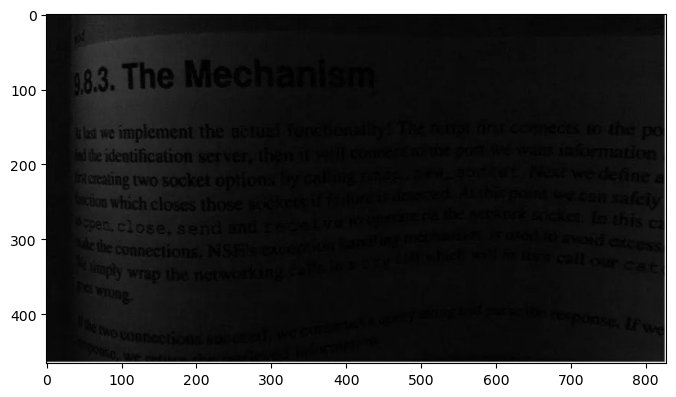

In [13]:
low_contrast_img = cv2.imread(r'img/c.jpg', 0)
show_img_plt(low_contrast_img)

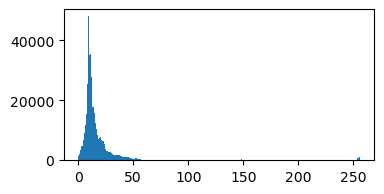

In [14]:
display_hist_plt(low_contrast_img)

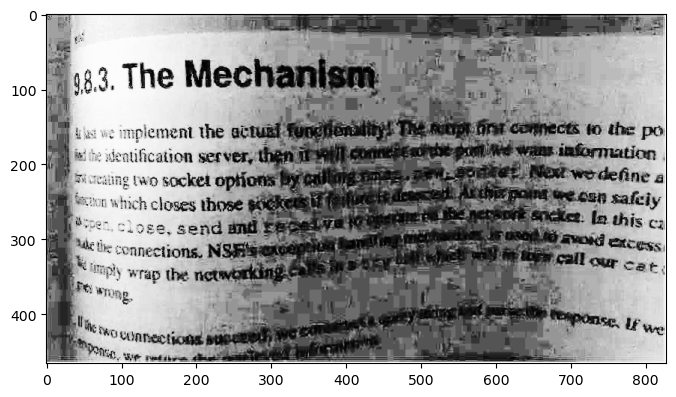

In [15]:
he_img = cv2.equalizeHist(low_contrast_img)
show_img_plt(he_img)

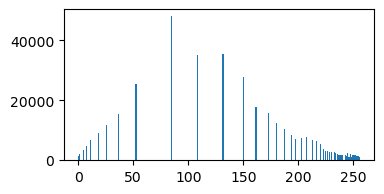

In [16]:
display_hist_plt(he_img)

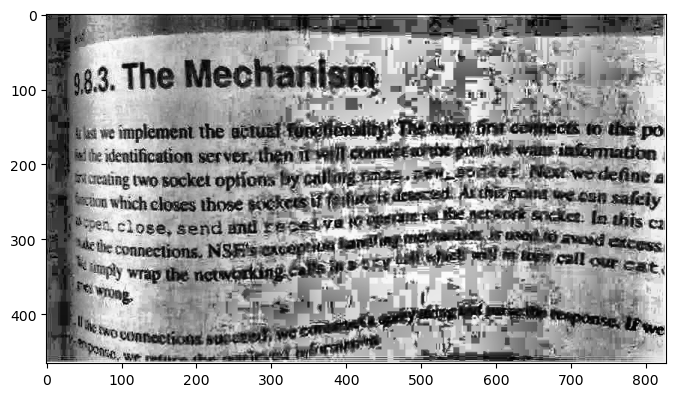

In [22]:
clahe = cv2.createCLAHE(clipLimit=100)
clahe_img = clahe.apply(low_contrast_img)
show_img_plt(clahe_img)

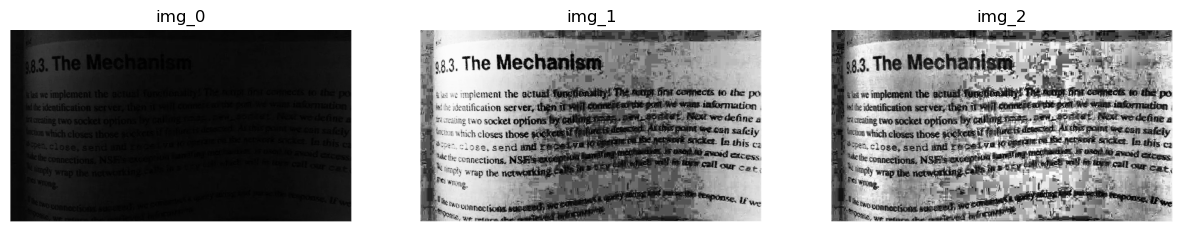

In [20]:
show_mult_img(1, 3, (low_contrast_img, he_img, clahe_img))

## Morphological Ops. 

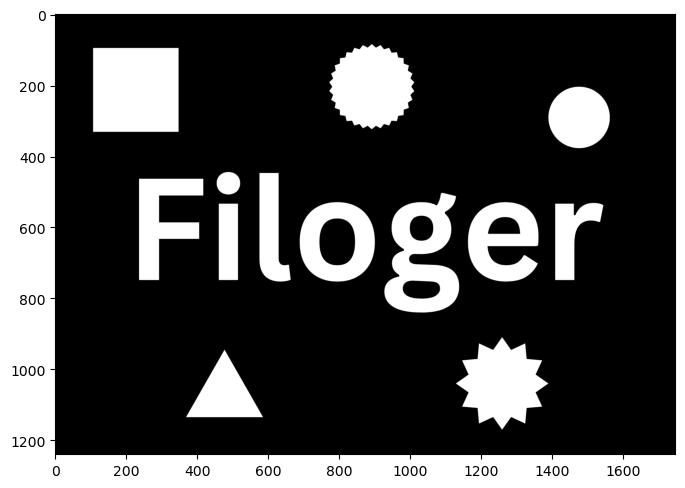

In [23]:
filoger_img = cv2.imread(r'img/filoger.png', 0)
show_img_plt(filoger_img)

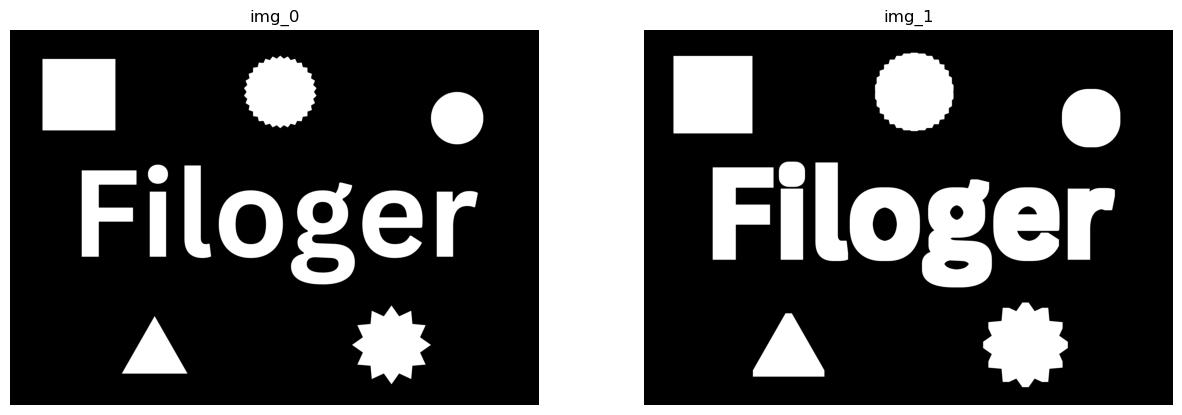

In [30]:
kernel = np.ones((5, 5), np.uint8)
dilated_img = cv2.dilate(filoger_img, kernel, iterations=5)
show_mult_img(1, 2, (filoger_img, dilated_img))

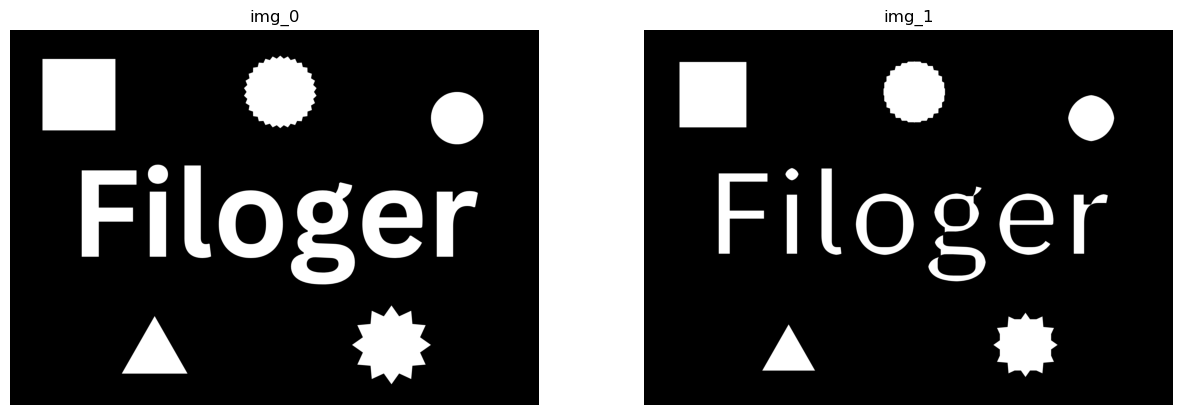

In [31]:
eroded_img = cv2.erode(filoger_img, kernel, iterations=5)
show_mult_img(1, 2, (filoger_img, eroded_img))

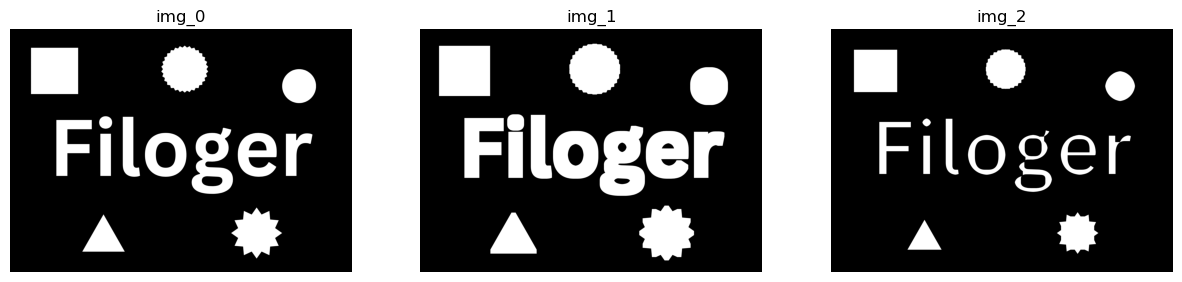

In [32]:
show_mult_img(1, 3, (filoger_img, dilated_img, eroded_img))

# Denoising